In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('nba_games.csv')
print(nba.head())

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899         -16  
2   53       59           L  0.359935          -6  
3   55       57           L  0.620204          -2  
4   68       63           W  0.339290           5  


In [12]:
knicks_pts = nba_2010[nba_2010.fran_id == "Knicks"]["pts"]
nets_pts = nba_2010[nba_2010.fran_id == "Nets"]["pts"]

mean_knicks_pts = np.mean(knicks_pts)
mean_nets_pts = np.mean(nets_pts)

#calc diff in mean values

diff_means_2010 = mean_knicks_pts - mean_nets_pts
print(diff_means_2010)

9.731707317073173


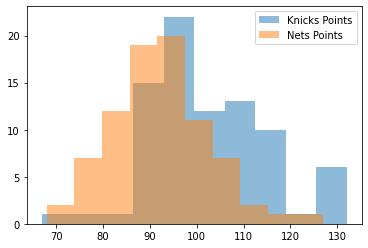

In [16]:
#plot overlapping histograms

plt.hist(knicks_pts, alpha=0.5, label='Knicks Points')
plt.hist(nets_pts, alpha=0.5, label='Nets Points')
plt.legend(loc='upper right')
plt.show()

0.44706798131809933


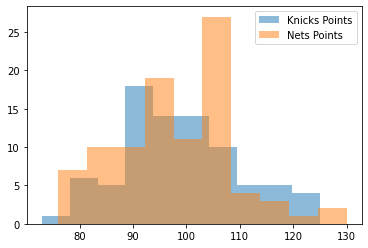

In [17]:
#Repeat process for 2014

knicks_pts_2014 = nba_2014[nba_2014.fran_id == "Knicks"]["pts"]
nets_pts_2014 = nba_2014[nba_2014.fran_id == "Nets"]["pts"]

mean_knicks_pts_2014 = np.mean(knicks_pts_2014)
mean_nets_pts_2014 = np.mean(nets_pts_2014)

#calc diff in mean values

diff_means_2014 = mean_knicks_pts_2014 - mean_nets_pts_2014
print(diff_means_2014)

plt.hist(knicks_pts_2014, alpha=0.5, label='Knicks Points')
plt.hist(nets_pts_2014, alpha=0.5, label='Nets Points')
plt.legend(loc='upper right')
plt.show()

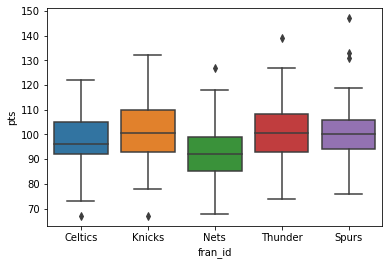

In [18]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

In [19]:
# Create contingency table of frequencies to compare game_result to game_location
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [20]:
# convert table of frequencies to table of proportions

location_result_proportions = location_result_freq / len(nba_2010)

print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [21]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


In [24]:
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_cov)

[[186.56   1.37]
 [  1.37   0.05]]


In [25]:
point_diff_forecast_corr = pearsonr(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_corr)

(0.44020887084680815, 9.410391573138826e-23)


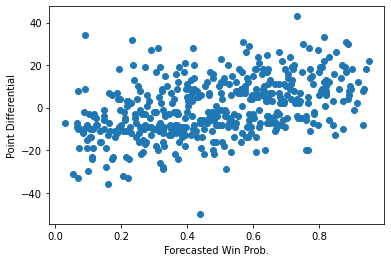

In [32]:
#Compare Forcast to point differential

plt.clf() #to clear the previous plot
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()